# Sentiment Analysis of Social media Text Data:
### Application feature: Can analyze the sentiment(Positive or Negative emotion) of given text data(data used here is Sentiment140 twitter text dataset).

### Click [here](https://www.kaggle.com/kazanova/sentiment140) to download the dataset.

### Let's begin
#### Let's import the required packages and load our dataset. 

In [243]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [244]:
DATASET_COL=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
data_frame = pd.read_csv('twitter.csv', encoding=DATASET_ENCODING, names=DATASET_COL)
data_frame.sample(5)

,target,ids,date,flag,user,text
5174,0,1469008161,Tue Apr 07 04:49:00 PDT 2009,NO_QUERY,ryzllXD,"Photo: got this from marjï¿½s multiply. awww, ..."
1116005,4,1973056977,Sat May 30 10:23:54 PDT 2009,NO_QUERY,callmaggie,"I love my porch chairs, they rock back &amp; f..."
964902,4,1827565321,Sun May 17 10:58:57 PDT 2009,NO_QUERY,joeybacon,@atcrawford I love me some Ruth's Chris.. I fo...
208373,0,1973707161,Sat May 30 11:40:33 PDT 2009,NO_QUERY,SynBen,Working today and it's beautiful out.
225090,0,1977568733,Sat May 30 21:14:13 PDT 2009,NO_QUERY,Ali__Elizabeth,"@mileycyrus I hope you feel better btw, does..."


### Exploratory Data analysis:
#### Gives the number of rows and columns:

In [245]:
data_frame.shape

(1600000, 6)

#### Let's check if null values are present:

In [246]:
np.sum(data_frame.isnull().any(axis=1))

0

#### Let's look for unique target values  in the data:

In [247]:
data_frame['target'].nunique()

2

#### Now let's plot the distribution for data:

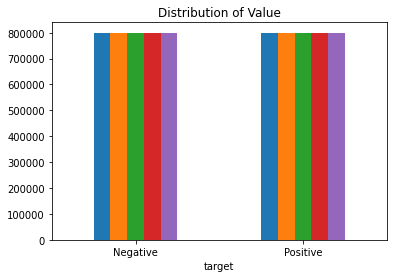

In [248]:
plot = data_frame.groupby('target').count().plot(kind='bar', title='Distribution of Value',legend=False)
plot.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing Value in lists.
text, sentiment = list(data_frame['text']), list(data_frame['target'])

#### Let's assign value with 2 columns: text and target:

In [249]:
Value=data_frame[['text','target']]
Value['target'] = Value['target'].replace(4,1)

C:\Users\esrka\AppData\Local\Temp/ipykernel_9796/1811710461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Value['target'] = Value['target'].replace(4,1)


#### Here we are setting target value  1 for positive  and 0 for negative:

In [250]:

Value_pos = Value[Value['target'] == 1]
Value_neg = Value[Value['target'] == 0]


#### Over here we are cuttinng the data into half so that our machines can run them easily...

In [251]:
Value_pos = Value_pos.iloc[:int(40000)]
Value_neg = Value_neg.iloc[:int(40000)]

#### After  cutting the  dateset we now concatanate  the  half positive and half negative Value:

In [252]:

data = pd.concat([Value_pos, Value_neg])

#### Here we are converting all the text to lower case...

In [253]:

data['text']=data['text'].str.lower()
data['text'].tail()

39995    have a quiz in spanish class tonday ..  but i ...
39996    @mittec no problems with it as such but i had ...
39997                                          ow my head 
39998    anyway... not particularly looking foreward to...
39999    allergies or insomnia? doesn't matter the reason 
Name: text, dtype: object

#### Let's make a list  of common words(stop words) that can be removed to increase the accuracy of the algorithm:

In [254]:
stopword_list = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [255]:
#We now using the above Stop_Words so that it can be removed to increase the accuracy of the algorithm
Stop_Words = set(stopword_list)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in Stop_Words])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

#### More cleaning of the data by removing repeated words, clearing out punctuations, numbers and URLs from the data:

In [256]:
#Here we are removing words which are repeated  multiple times in the text Value
def Clear_repeated_words(text):
    return re.sub(r'(.)1+', r'1', text)
data['text'] = data['text'].apply(lambda x: Clear_repeated_words(x))
data['text'].tail()

39995          quiz spanish class tonday .. but think pass
39996    @mittec no problems but literally spent 2 hour...
39997                                              ow head
39998    anyway... not particularly looking foreward la...
39999            allergies insomnia? doesn't matter reason
Name: text, dtype: object

In [257]:
#In this step we are clearing out punctuation from the text Value
import string
eng_punctuations = string.punctuation
punctuations_list = eng_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()


39995            quiz spanish class tonday  but think pass
39996    mittec no problems but literally spent 2 hours...
39997                                              ow head
39998    anyway not particularly looking foreward labs ...
39999              allergies insomnia doesnt matter reason
Name: text, dtype: object

In [258]:
#Removing numbers from the text Value
def clear_numbers(Value):
    return re.sub('[0-9]+', '', Value)
data['text'] = data['text'].apply(lambda x: clear_numbers(x))
data['text'].tail()

39995            quiz spanish class tonday  but think pass
39996    mittec no problems but literally spent  hours ...
39997                                              ow head
39998    anyway not particularly looking foreward labs ...
39999              allergies insomnia doesnt matter reason
Name: text, dtype: object

In [259]:

#Removing URL's from the text Value
def clear_URLs(Value):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',Value)
data['text'] = data['text'].apply(lambda x: clear_URLs(x))
data['text'].tail()

39995            quiz spanish class tonday  but think pass
39996    mittec no problems but literally spent  hours ...
39997                                              ow head
39998    anyway not particularly looking foreward labs ...
39999              allergies insomnia doesnt matter reason
Name: text, dtype: object

### Now let's perform stemming, tokenization and lemmatization:
![](https://github.com/sri-ram-kalyan/SocialMediaSentimentAnalysis/blob/main/assets/stemlem.jpg?raw=truehttps://github.com/sri-ram-kalyan/SocialMediaSentimentAnalysis/blob/main/assets/stemlem.jpg?raw=true)
<img src="https://github.com/sri-ram-kalyan/SocialMediaSentimentAnalysis/blob/main/assets/token.jpg?raw=true" alt="Tokenization" />

In [260]:
# Here we are performing stemming operation
import nltk
stem = nltk.PorterStemmer()
def stemming_text(Value):
    text = [stem.stem(word) for word in Value]
    return Value
data['text']= data['text'].apply(lambda x: stemming_text(x))
data['text'].head()

800000                    love healthuandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                        lovesbrooklyn effect everyone
Name: text, dtype: object

In [261]:
from nltk.tokenize import TweetTokenizer
token = TweetTokenizer()
data['text'].apply(token.tokenize)

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
                                ...                        
39995      [quiz, spanish, class, tonday, but, think, pass]
39996     [mittec, no, problems, but, literally, spent, ...
39997                                            [ow, head]
39998     [anyway, not, particularly, looking, foreward,...
39999         [allergies, insomnia, doesnt, matter, reason]
Name: text, Length: 80000, dtype: object

In [262]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lm = nltk.WordNetLemmatizer()
def lemmatizer_text(Value):
    text = [lm.lemmatize(word) for word in Value]
    return Value
data['text'] = data['text'].apply(lambda x: lemmatizer_text(x))
data['text'].head()

800000                    love healthuandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                        lovesbrooklyn effect everyone
Name: text, dtype: object

#### Separating the 80% Value for training Value and 20% for testing Value:

In [263]:
X=Value.text
y=Value.target


In [264]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =26105111)

![TF-IDF Vectorizer](https://github.com/sri-ram-kalyan/SocialMediaSentimentAnalysis/blob/main/assets/TFIDF.png?raw=true)

In [265]:
Vector = TfidfVectorizer(ngram_range=(1,2), max_features=800000)
Vector.fit(X_train)
print('No. of feature_words: ', len(Vector.get_feature_names_out()))

No. of feature_words:  800000


In [266]:
X_train = Vector.transform(X_train)
X_test  = Vector.transform(X_test)

#### Let's build a model evaluation function to save time:

In [267]:
def model_Evaluate(model):
    # Predict values for Test data
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the data.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### SVC:
![SVM sample](https://github.com/sri-ram-kalyan/SocialMediaSentimentAnalysis/blob/main/assets/svmp.png?raw=true)
![SVM def](https://github.com/sri-ram-kalyan/SocialMediaSentimentAnalysis/blob/main/assets/svmt.png?raw=true)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81    159838
           1       0.81      0.82      0.82    160162

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000

Training Accuracy : 0.9327015625
Testing Accuracy : 0.81554375


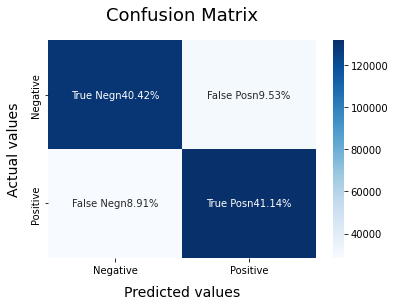

In [268]:
SVC = LinearSVC()
SVC.fit(X_train, y_train)
model_Evaluate(SVC)
y_pred1 = SVC.predict(X_test)
print("Training Accuracy :", SVC.score(X_train, y_train))
svcscore= SVC.score(X_test, y_test)
print("Testing Accuracy :",svcscore )

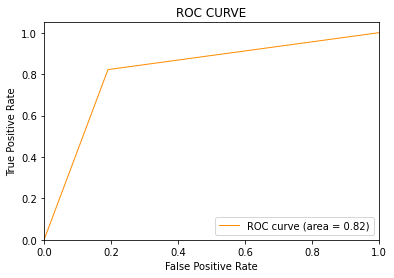

In [269]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Bernoulli Naive Bayes and Multinomial Naive Bayes:
![Naive Bayes](https://github.com/sri-ram-kalyan/SocialMediaSentimentAnalysis/blob/main/assets/nb.png?raw=true)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80    159838
           1       0.80      0.81      0.80    160162

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000

Training Accuracy : 0.8473234375
Testing Accuracy : 0.80039375


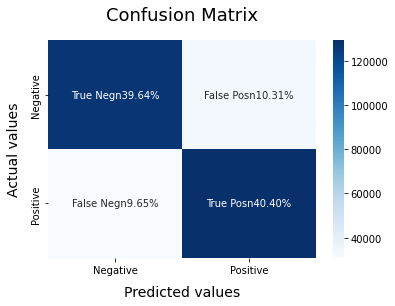

In [270]:
BernoulliNB = BernoulliNB()
BernoulliNB.fit(X_train, y_train)
model_Evaluate(BernoulliNB)
y_pred2 = BernoulliNB.predict(X_test)
print("Training Accuracy :", BernoulliNB.score(X_train, y_train))
bnbscore= BernoulliNB.score(X_test, y_test)
print("Testing Accuracy :",bnbscore )


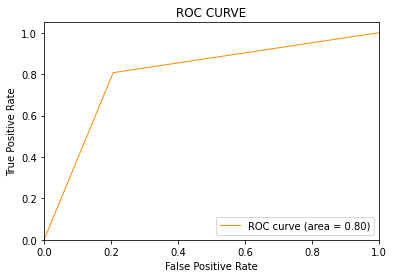

In [271]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.82      0.81    159838
           1       0.82      0.79      0.80    160162

    accuracy                           0.80    320000
   macro avg       0.81      0.80      0.80    320000
weighted avg       0.81      0.80      0.80    320000

Training Accuracy : 0.85340625
Testing Accuracy : 0.804584375


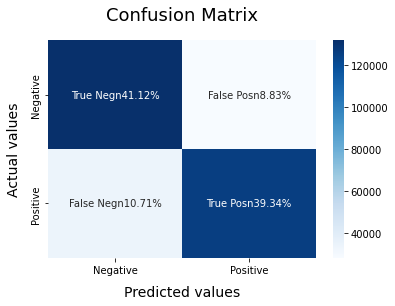

In [272]:
from sklearn.naive_bayes import MultinomialNB
mnbmodel = MultinomialNB()
mnbmodel.fit(X_train, y_train)
mnbpredict = mnbmodel.predict(X_test)
model_Evaluate(mnbmodel)
print("Training Accuracy :", mnbmodel.score(X_train, y_train))
mnbscore=mnbmodel.score(X_test, y_test)
print("Testing Accuracy :", mnbscore)


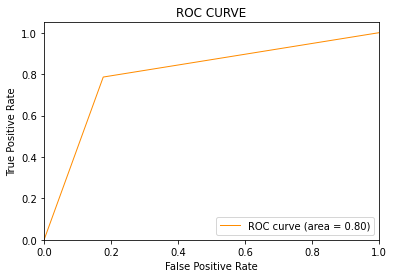

In [273]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, mnbpredict)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression:
![LogisticRegression](https://github.com/sri-ram-kalyan/SocialMediaSentimentAnalysis/blob/main/assets/lr.png?raw=true

              precision    recall  f1-score   support

           0       0.83      0.82      0.82    159838
           1       0.82      0.83      0.83    160162

    accuracy                           0.83    320000
   macro avg       0.83      0.83      0.83    320000
weighted avg       0.83      0.83      0.83    320000

Training Accuracy : 0.880053125
Testing Accuracy : 0.825321875


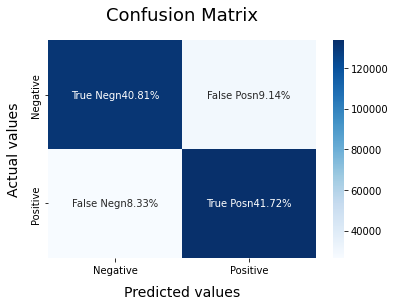

In [274]:
LogisticRegression = LogisticRegression(C = 2, max_iter = 2000, n_jobs=-1)
LogisticRegression.fit(X_train, y_train)
model_Evaluate(LogisticRegression)
y_pred3 = LogisticRegression.predict(X_test)
print("Training Accuracy :", LogisticRegression.score(X_train, y_train))
lrscore=LogisticRegression.score(X_test, y_test)
print("Testing Accuracy :", lrscore)

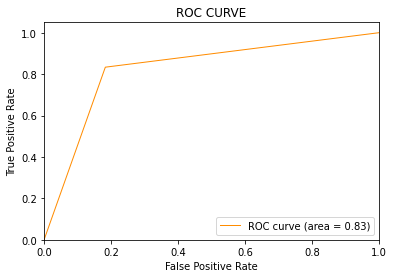

In [275]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [276]:
####from sklearn.tree import DecisionTreeClassifier

##DTC = DecisionTreeClassifier()
####DTC.fit(X_train, y_train)
##model_Evaluate(DTC)
##y_pred = DTC.predict(X_test)

####print("Training Accuracy :", DTC.score(X_train, y_train))
##print("Testing Accuracy :", DTC.score(X_test, y_test))

### Experimenting:
#### 1. Hyper parameter tuning:
![HPT](https://github.com/sri-ram-kalyan/SocialMediaSentimentAnalysis/blob/main/assets/hyper.png?raw=true)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80    159838
           1       0.81      0.79      0.80    160162

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000

Training Accuracy : 0.87908671875
Testing Accuracy : 0.797640625


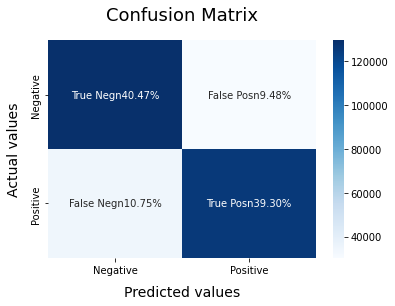

In [277]:
#Hyper parameter tuning
from sklearn.naive_bayes import MultinomialNB
mnbmodel = MultinomialNB(alpha=0.1)
mnbmodel.fit(X_train, y_train)
mnbpredict = mnbmodel.predict(X_test)
model_Evaluate(mnbmodel)
print("Training Accuracy :", mnbmodel.score(X_train, y_train))
print("Testing Accuracy :", mnbmodel.score(X_test, y_test))


              precision    recall  f1-score   support

           0       0.77      0.79      0.78    159838
           1       0.79      0.77      0.78    160162

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Training Accuracy : 0.89388984375
Testing Accuracy : 0.77969375


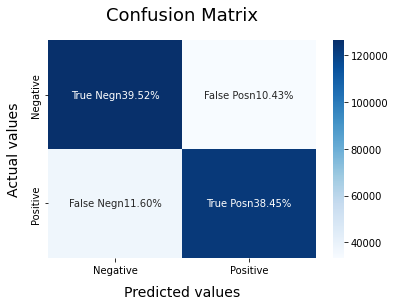

In [278]:
from sklearn.naive_bayes import MultinomialNB
mnbmodel = MultinomialNB(alpha=0.0001)
mnbmodel.fit(X_train, y_train)
mnbpredict = mnbmodel.predict(X_test)
model_Evaluate(mnbmodel)
print("Training Accuracy :", mnbmodel.score(X_train, y_train))
print("Testing Accuracy :", mnbmodel.score(X_test, y_test))


              precision    recall  f1-score   support

           0       0.77      0.79      0.78    159838
           1       0.78      0.77      0.78    160162

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Training Accuracy : 0.89445078125
Testing Accuracy : 0.77744375


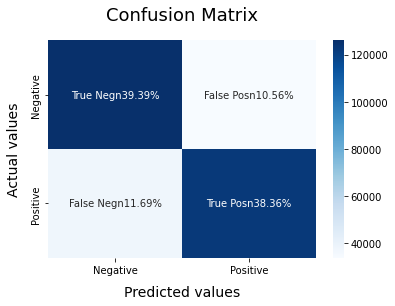

In [279]:
from sklearn.naive_bayes import MultinomialNB
mnbmodel = MultinomialNB(alpha=0.0000001)
mnbmodel.fit(X_train, y_train)
mnbpredict = mnbmodel.predict(X_test)
model_Evaluate(mnbmodel)
print("Training Accuracy :", mnbmodel.score(X_train, y_train))
print("Testing Accuracy :", mnbmodel.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78    159838
           1       0.78      0.77      0.77    160162

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Training Accuracy : 0.8944671875
Testing Accuracy : 0.77726875


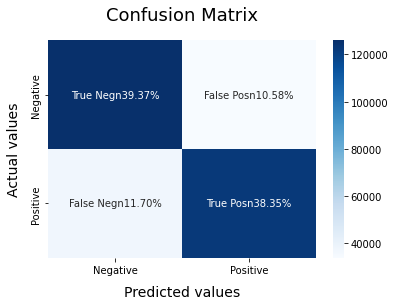

In [280]:
from sklearn.naive_bayes import MultinomialNB
mnbmodel = MultinomialNB(alpha=0.0000000001)
mnbmodel.fit(X_train, y_train)
mnbpredict = mnbmodel.predict(X_test)
model_Evaluate(mnbmodel)
print("Training Accuracy :", mnbmodel.score(X_train, y_train))
print("Testing Accuracy :", mnbmodel.score(X_test, y_test))

#### 2. Overfitting:
![of](https://github.com/sri-ram-kalyan/SocialMediaSentimentAnalysis/blob/main/assets/of.png?raw=true)
#### One of the ways of overfitting is too less of training data. I will be demonstrating that below by switching the use of train and test data (from 80-20 to 20-80):

              precision    recall  f1-score   support

           0       0.89      0.89      0.89    159838
           1       0.89      0.90      0.89    160162

    accuracy                           0.89    320000
   macro avg       0.89      0.89      0.89    320000
weighted avg       0.89      0.89      0.89    320000

Training Accuracy : 0.891346875
Testing Accuracy : 0.811725


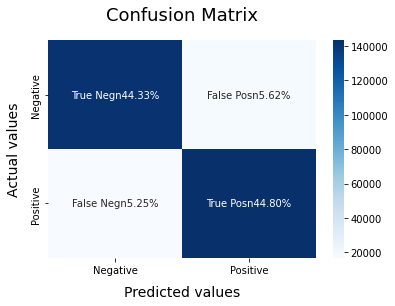

In [281]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression(C = 2, max_iter = 2000, n_jobs=-1)
LogisticRegression.fit(X_test, y_test)
model_Evaluate(LogisticRegression)
y_predexp = LogisticRegression.predict(X_train)
print("Training Accuracy :", LogisticRegression.score(X_test, y_test))
print("Testing Accuracy :", LogisticRegression.score(X_train, y_train))

#### 3. Experiments with other models:
##### I have tried using Random forest classifier and Decision tree classifier but DTC took more 92 min and I had to restart the kernal and RFC took more than 40 min and again I had to reset the kernal. Such tremendous run time is useless for this application.

### Our Model Accuracies:

In [282]:
accuracy_list= pd.DataFrame([["Linear SVC",svcscore],["Bernoulli's NB",bnbscore],["MultinomialNB",mnbscore],["LogisticRegression",lrscore]],columns=["Model","Accuracy"])
accuracy_list

,Model,Accuracy
0,Linear SVC,0.815544
1,Bernoulli's NB,0.800394
2,MultinomialNB,0.804584
3,LogisticRegression,0.825322


G:\Python\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


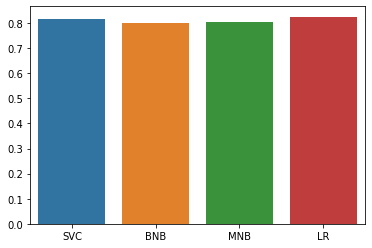

In [283]:
x=['SVC','BNB','MNB','LR']
y=[svcscore,bnbscore,mnbscore,lrscore]
sns.barplot(x,y)
plt.show()

## Contribution:
#### I have followed [this tutorial](https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/) to learn and understand and I have implemented it own my own along with additional visualizations. I have also implemented additional models(Multinomial Naive Bayes and it's experiments) and experimented with other models such as Random Forest Classifier and Decision Tree Classifier. I have also demonstrated Hyper parameter tuning and Overfitting.


## Challenges and it's solution:
#### Handling the text data was a huge challenge as it was a lot confusing and a lot of pre-processing is required. Also visualizations and understanding how each model works was a learning process. I have gone through several websites and videos to learn and implement this project.

## References:
 (https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/) </br>
 (https://www.simplilearn.com/tutorials/machine-learning-tutorial/overfitting-and-underfitting#reasons_for_overfitting)</br>
 (https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)</br>
 (https://scikit-learn.org/stable/user_guide.html)</br>
 (https://www.kaggle.com/kazanova/sentiment140)</br>
 (https://www.youtube.com/c/sentdex/playlists)</br>

In [285]:
!jupyter nbconvert --to html Untitled-1.ipynb

[NbConvertApp] Converting notebook Untitled-1.ipynb to html
[NbConvertApp] Writing 985553 bytes to Untitled-1.html
